# ECON 8185 - HW 2

João Lazzaro - santo279@umn.edu

Incomplete Version

## Question 1

We'll consider the following Prototype model from Ellen's Homework 2, which is the same as CKM:

$$\max_{c_t,x_t,l_t} E \sum_{t=0}^\infty \beta^t \frac{\left(c_tl_t^\psi\right)^{1-\sigma}}{1-\sigma} N_t$$
S.T. 
$$ c_t +(1+\tau_{xt}x_t =r_t k_t +(1-\tau_{ht})w_t h_t + T_t$$
$$ N_{t+1} k_{t+1} = [(1-\delta)k_t+x_t]N_t$$
$$h_t+l_t =1$$
$$S_t = P S_{t-1}+Q\epsilon_t,\;\;S_t = [\ln z_t,\tau_{ht},\tau_{xt}, \ln g_t]$$
$$ c_t,x_t\geq0$$

Where $N_t = (1+\gamma_n)^t$ and firm tecnhology is $Y_t = K_t^\theta (Z_t L_t)^{1-\theta}$. $\gamma_z$ is the rate of labor-augmenting technical progress. The stochastic shocks hitting this economy affect technology, tax rates, and government spending and the stochastic processes are modeled as a VAR(1) process. The resource constraint is $Y_t=N_t(c_t +x_t +g_t)$. We must work with detrended variables, we should use "hat" variables, but typing this is time consuming so from now on all variables should be understood as detrended unless I say something about them.

The detrended FOC's of this model are:

$$c_t+(1+\gamma_z)(1+\gamma_n)k_{t+1} - (1-\delta)k_t+g_t = y_t =k_t^\theta(z_th_t)^{1-\theta}$$
$$\psi \frac{c_t}{1-h_t} = (1-\tau_{ht})(1-\theta)\left(\frac{k_t}{h_t}\right)^\theta z_t^{1-\theta}$$
$$c_t^{-\sigma}(1-h_t)^{\psi(1-\sigma)} (1+\tau_{xt})=\beta(1+\gamma_z)^{-\sigma}E_t c_{t+1}^{-\sigma} (1- h_{t+1})^{\psi(1-\sigma)}\left(\theta k_{t+1}^{\theta}(z_{t+1} h_{t+1})^{1-\theta} + (1-\delta)(1+\theta_{xt+1})\right)$$

Defining some parameters:

In [1]:
using Plots, NLsolve, ForwardDiff, DataFrames, LinearAlgebra, QuantEcon, Plots, Optim, Statistics
#Parameters:
δ = 1   #depreciation rate
θ = 1/3  #capital share of output
β = 0.9  #Discouting
σ = 2  #Elasticity of Intertemporal Substitution
ψ = 1    #Labor parameter
γn= 0.00    #Population growth rate
γz= 0.00   #Productivitu growth rate
gss = 0.1 #average g
τxss = 0.05 #average τx
τhss = 0.02 #average τh
zss = 0.0 #average z (z is in logs)


#Parameters to be estimated
ρg = 0.8
ρx = 0.5
ρh = 0.7
ρz = 0.9

σg= 0.02
σx = 0.01
σz = 0.02
σh = 0.01

┌ Info: Recompiling stale cache file C:\Users\jgsla\.julia\compiled\v1.0\NLsolve\KFCNP.ji for NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\jgsla\.julia\compiled\v1.0\QuantEcon\V0Mv9.ji for QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1184


0.01

Substituting for $c$, we get an euqation for $k$, and one for $h$. Below, I find the Steady State values:


In [2]:
#Function with the FOCs
zss = exp(zss)

function SS!(eq, vector::Vector)
    k,h = (vector)
    k1 = k
    h1 = h
    g, τx,τh, z = gss,τxss,τhss, zss
    z1 = z
    τx1 = τx

    c = k * ((z *h)^(1-θ))^(1/θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+ g )^(1/θ)
    c1 = c
    eq[1] = (ψ *c)^(1/θ)  - (k/h)*((1-h)*(1-τh)*(1-θ)*z^(1-θ))^(1/θ)

    eq[2] = (c^(-σ) *(1-h)^(ψ*(1-σ))*(1+τx)  - (1-δ)*(1+τx1)* β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)))^(-1/θ) -
     (β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)) * θ*(z1*h1)^(1-θ))^(-1/θ)* k1
    return eq
end

kss = (θ*β)^(1/θ)

SteadyState = nlsolve(SS!, [0.2,0.8],ftol = :1.0e-20, method = :trust_region , autoscale = true)
kss,hss = SteadyState.zero

2-element Array{Float64,1}:
 0.06450057178639043
 0.8483596073490938 

Log-linearizing the equations we get the following system of equations:


$$ 0 = E_t[a_1\tilde{k}_t +a_2\tilde{k}_{t+1}+a_3\tilde{h}_t+a_4 \tilde{z}_t + a_5 \tilde{\tau}_{ht} +a_6 \tilde{g}_t] $$
$$ 0 = E_t[b_1\tilde{k}_t +b_2\tilde{k}_{t+1}+b_3\tilde{k}_{t+2}+b_4 \tilde{h}_t + b_5 \tilde{h}_{t+1} b_6 \tilde{z}_t +b_7 \tilde{\tau}_{xt} +b_8 \tilde{g}_t + b_9 \tilde{z}_{t+1} +b_{10} \tau_{xt+1}+b_{11}\tilde{g}_{t+1}]  $$

Where tilde variables are log deviations from Steady State. Stacking up the equations we get:
$$0 = E_t \begin{bmatrix}
    1       & 0 & 0  \\
    0       & 0 & 0  \\
    0       & b_3 & b_5 
\end{bmatrix}
\begin{bmatrix}
    \tilde{k}_{t+1}\\
    \tilde{k}_{t+2}\\
    \tilde{h}_{t+1}        
\end{bmatrix} + \begin{bmatrix}
    0       & -1 & 0  \\
    a_1       & a_2 & a_3  \\
    b_1       & b_2 & b_4 
\end{bmatrix}
\begin{bmatrix}
    \tilde{k}_{t}\\
    \tilde{k}_{t+1}\\
    \tilde{h}_{t}        
\end{bmatrix} + \begin{bmatrix}
    0       & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
    a_4       & a_5 & 0 & a_6 &0&0&0&0  \\
    b_6       & 0 & b_7 & b_8 & b_9 & 0 &b_{10} & b_{11} 
\end{bmatrix}\begin{bmatrix}
    S_t\\
    S_{t+1}        
\end{bmatrix}$$
We call the first matrix $A_1$, and the second $A_2$. The code below log-linearizes and find these matrices:

In [3]:

function loglineq1(vector::Vector)
    k,k1,h,z,τh,g= vector

    c = k * ((z *h)^(1-θ))^(1/θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+ g )^(1/θ)
    eq =(ψ *c)^(1/θ)  - (k/h)*((1-h)*(1-τh)*(1-θ)*z^(1-θ))^(1/θ)

    return eq
end
function loglineq2(vector::Vector)
    k,k1,k2,h,h1,z,τx,g,z1,τx1,g1 = (vector)
    c = k * ((z *h)^(1-θ))^(1/θ) - ((1+γz)*(1+γn)*k1-(1-δ)*k+ g )^(1/θ)
    c1 = k * ((z1 *h1)^(1-θ))^(1/θ) - ((1+γz)*(1+γn)*k2-(1-δ)*k1+ g1 )^(1/θ)
    eq =  (c^(-σ) *(1-h)^(ψ*(1-σ))*(1+τx)  - (1-δ)*(1+τx1)* β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)))^(-1/θ) -
     (β*(1+γz)^(-σ) * c1^(-σ) * (1-h1)^(ψ*(1-σ)) * θ*(z1*h1)^(1-θ))^(-1/θ)* k1
    return eq
end


#log deviations
T=ForwardDiff.gradient(loglineq1,[kss,kss,hss,zss,τhss,gss])
a =[-kss*T[1]/(kss*T[1]),-kss*T[2]/(kss*T[1]),-hss*T[3]/(kss*T[1]),
-zss*T[4]/(kss*T[1]),-τhss*T[5]/(kss*T[1]),-gss*T[6]/(kss*T[1])]
#if ψ==0
#    a[1],a[2:end]=-1,zeros(5)
#end

T=ForwardDiff.gradient(loglineq2,[kss,kss,kss,hss,hss,zss,τxss,gss,zss,τxss,gss])
b = [kss*T[1]/(-kss*T[1]),kss*T[2]/(-kss*T[1]),kss*T[3]/(-kss*T[1]),hss*T[4]/(-kss*T[1]),
hss*T[5]/(-kss*T[1]),zss*T[6]/(-kss*T[1]),τxss*T[7]/(-kss*T[1]),gss*T[8]/(-kss*T[1]),
zss*T[9]/(-kss*T[1]),τxss*T[10]/(-kss*T[1]),gss*T[11]/(-kss*T[1])]

A1 = [1 0 0; 0 0 0; 0 b[3] b[5]]
A2 = [0 -1 0; a[1] a[2] a[3]; b[1] b[2] b[4]]
U = [0 0 0 0 0 0 0 0;
a[4] a[5] 0 a[6] 0 0 0 0;
b[6] 0 b[7] b[8] b[9] 0 b[10] b[11]]

A1,A2

([1.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.15248 1.12256], [0.0 -1.0 0.0; -1.0 0.161454 -10.5341; -1.0 -0.24338 -0.186122])

We look for a solution of the form: $$\tilde{k}_{t+1} = A \tilde{k}_t +BS_t $$ $$ Z_t = C X_t + D S_t $$ $$S_t = P S_{t-1} + Q \epsilon_t$$
Where $Z_t = [\tilde{k}_{t+1},\tilde{h}_t]'$ and $S_t$ are the stochastic exogenous variables. We compute the generalized eigenvalues and eigenvectors for matrices $A_1$ and $−A_2$ because $A_1$ is not invertible. Thus, $A_2 V = -A_1 V \Pi$ and we can get $A$ and $C$ by:
$$A = V_{11} \Pi_{1,1} V_{1,1}^{-1}$$
 $$C = V_{2,1}V_{1,1}^{-1}$$

In [4]:
eig = eigen(A1,-A2)
V=eig.vectors
Π = eig.values
#Sorting
for j=1:3
for i=1:2
    if eps(Float64)<abs(Π[i+1])<abs(Π[i])
        Π[i],Π[i+1] = Π[i+1],Π[i]
        V[:,i],V[:,i+1] = V[:,i+1],V[:,i]
    elseif abs(Π[i]) < eps(Float64)
        Π[i],Π[end] =Π[end],Π[i]
        V[:,i],V[:,end]=V[:,end],V[:,i]
    end
end
end
if abs(Π[1])>1
    error("All Eigen Values outside unit circle")
end
Π= Diagonal(Π)

3×3 Diagonal{Float64,Array{Float64,1}}:
 0.273179    ⋅         ⋅         
  ⋅        -0.632321   ⋅         
  ⋅          ⋅        5.12332e-20

In [5]:
A = V[1,1]*Π[1,1]*inv(V[1,1])
C = V[2:end,1]*(V[1,1])
C = hcat(C,zeros(2,1))

2×2 Array{Float64,2}:
  0.273179    0.0
 -0.00289734  0.0

In [6]:
P = [ρz 0 0 0;
0 ρh 0 0 ;
0 0 ρx 0 ;
0 0 0 ρg]
Q = [σz 0 0 0;
0 σh 0 0 ;
0 0 σx 0 ;
0 0 0 σg]

4×4 Array{Float64,2}:
 0.02  0.0   0.0   0.0 
 0.0   0.01  0.0   0.0 
 0.0   0.0   0.01  0.0 
 0.0   0.0   0.0   0.02

Finally, to get the matrices $B$ and $D$, we just need to solve a linear system of equations (see Ellen's notes):

In [7]:
function system!(eq,vector::Vector)
    #vector = rand(8)
    #eq= rand(8)
    B=vector[1:4]'
    D2 = vector[5:8]'

    eq[1:4] = a[2].*B .+ a[3].*D2 .+ [a[4] a[5] 0 a[6]]
    eq[5:8] = b[2].*B .+ b[3].*A.*B .+ b[3].*B*P .+ b[4].*D2 .+ b[5].*C[2].*B .+ b[5].*B*P.+
    [b[6] 0 b[7] b[8]].+[b[9] 0 b[10] b[11] ]*P
 return     eq
end

Sol = nlsolve(system!, ones(8),ftol = :1.0e-20, method = :trust_region , autoscale = true)
D=ones(2,4)
D[1,:]= Sol.zero[1:4]
D[2,:]= Sol.zero[5:8]


4-element Array{Float64,1}:
 -0.16820511698158988  
 -0.002517589267184217 
  0.0002701330297408085
  0.02143783795673327  

Now, I will rewrite the model in the form of the exercise, namely: 
 $$ X_{t+1} = AX_t + B \varepsilon_{t+1}$$
$$Y_t = CX_t+\omega_t$$
Where, $X_t = [k_t,s_t],s_t=[z_t,\tau_{ht},\tau_{xt},g_t]$, $Y_t = [y_t,x_t,h_t]$ and as before:
$$s_{t+1} = P s_t +Q \varepsilon_{t+1}$$
We need to log linearize $y,x$ since we already done it for labor:

In [8]:

#Rewritting to match Anmol's notation
A = hcat(vcat(C[1],zeros(4,1)),vcat(D[1,:]',P))
B = hcat(zeros(5,1),vcat(zeros(1,4),Q))


#We have h as function of states. To find the Matrix B, we need to find y and x
#as a function of states

function kt1(vector::Vector)
    k,z,τh,τx,g = vector
    tilde = log.([k,z,τh,τx,g]).-log.([kss,zss,τhss,τxss,gss])
    for i = 1:length(tilde)
        if isnan(tilde[i])
            tilde[i] = 0
        end
    end

    k1= A[1,:]' * tilde
    return k1
end


function ht(vector::Vector)
    k,z,τh,τx,g = vector
    tilde = log.([k,z,τh,τx,g]).-log.([kss,zss,τhss,τxss,gss])
    for i = 1:length(tilde)
        if isnan(tilde[i])
            tilde[i] = 0
        end
    end
    h = C[2,1]*(log(k)-log(kss)) + D[2,:]' * tilde[2:end]
    return h
end


ht (generic function with 1 method)

In [9]:
#log-linearizing y as a function of states
function yt(vector::Vector)
    k,z,τh,τx,g = vector
    h = exp(ht(vector)+log(hss))
    y = k^θ * (z*h)^(1-θ)
    return y
end

#GDP
yss = kss^(θ)*(zss*hss)^(1-θ)

T=ForwardDiff.gradient(yt,[kss,zss,τhss,τxss,gss])
ycoefs = [kss*T[1]/yss,zss*T[2]/yss,τhss*T[3]/yss,τxss*T[4]/yss,gss*T[5]/yss]



#log linearizing x as function of states
function xt(vector::Vector)
    k,z,τh,τx,g = vector
    k1 = exp(kt1(vector)+log(kss))
    x= (1+γn)*(1+γz)k1 - (1-δ)k

    return x
end
xss = (1+γz)*(1+γn)*kss-(1-δ)*kss
T=ForwardDiff.gradient(xt,[kss,zss,τhss,τxss,gss])
xcoefs = [kss*T[1]/xss,zss*T[2]/xss,τhss*T[3]/xss,τxss*T[4]/xss,gss*T[5]/xss]

#We have the matrix C!
C = [ycoefs[1] ycoefs[2] ycoefs[3] ycoefs[4] ycoefs[5];
xcoefs[1] xcoefs[2] xcoefs[3] xcoefs[4] xcoefs[5];
C[2,1] D[2,1] D[2,2] D[2,3] D[2,4]]


3×5 Array{Float64,2}:
  0.331402     0.55453   -0.00167839   0.000180089   0.0142919
  0.273179     1.41284   -0.000681521  0.0176249    -0.151655 
 -0.00289734  -0.168205  -0.00251759   0.000270133   0.0214378

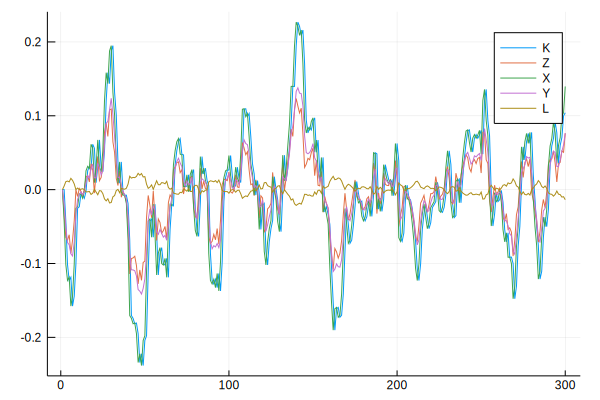

In [10]:
#defining the vectors
T=300
X= ones(5,T).* [0,0,0,0,0]
Y = ones(3,T).*[0,0,0]


for t=1:T

    if t>1
    X[:,t] = A*X[:,t-1]+ B*randn(5,1)
    end
    Y[:,t] = C*X[:,t] 
end
t=2
A*X[:,t-1]
plot([X[1,:],X[2,:],Y[2,:],Y[1,:],Y[3,:]],labels = ["K","Z","X","Y","L"])

The code above is summarized in a function State_Space which returns the matrices A,B,C

In [47]:
include("State_Space.jl")

State_Space (generic function with 2 methods)

## Question 2


### Data

We have quarterly data from Q3/1947 - Q4/2017

A brief description of data used is below:

h:  Total hours per capita from Prescott, Ueberfeldt, and Cociuba 

y:  Real GDP from BEA NIPA table 1.1.6

g:  Government consumption from BEA NIPA table 3.9.5 deflated by PCE

x:  Real gross private domestic investment from BEA NIPA table 1.1.6 + government gross investment 3.9.5 (deflated by PCE)

y,g,x are in percapita terms (data was divided by population from Prescott, Ueberfeldt, and Cociuba)

We consider only logs and the trend of y,g and x was removed using HP filter 1600

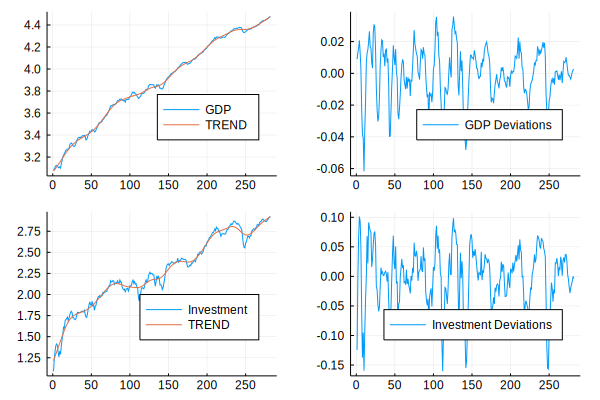

In [12]:
include("load_data.jl")
DATA = loaddata()
plot(
    plot([DATA[:GDP],DATA[:GDP_trend]],legend = :bottomright, label = ["GDP","TREND"]),
    plot([DATA[:GDP_dev]], label = ["GDP Deviations"],legend = :bottomright),
    plot([DATA[:Investment],DATA[:Investment_trend]],legend = :bottomright, label = ["Investment","TREND"]),
    plot([DATA[:Investment_dev]],legend = :bottomright, label = ["Investment Deviations"])

    )

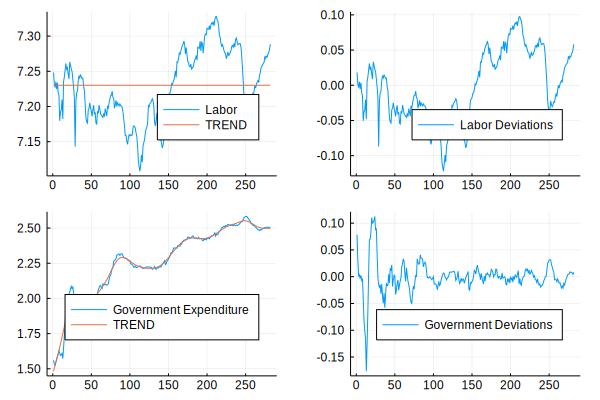

In [13]:
plot(      plot([DATA[:Labor],DATA[:Labor_trend]],legend = :bottomright, label = ["Labor","TREND"]),
        plot([DATA[:Labor_dev]],legend = :bottomright, label = ["Labor Deviations"]),
        plot([DATA[:GOV],DATA[:GOV_trend]],legend = :bottomright, label = ["Government Expenditure","TREND"]),
        plot([DATA[:GOV_dev]],legend = :bottomright, label = ["Government Deviations"])
    )

## Question 3

The Code below implements the Kalman Filter. I follow Ljunqvist and Sargent chapter 2 for that. We will plot the results below with the data above. Note that at this point I did not estimate P and Q.


In [14]:
using Statistics
include("KalmanFilter.jl")
function KalmanFilter(Y,A,B,C)
#Y: Observed variables - measurement
n = size(A)[1] #number of state variables
m = size(C)[1] #number of measurement variables
T = size(Y)[2] #Sample size

#Initializing the state variables at the unconditional mean
X = zeros(n,T)
#Since this is in log-deviations, they are all zero!

#Variance initial guess is the unconditional mean. 
#This recursion gets it similarly to what we've done with Shimer
Σ = ones(n,n)*ones(n,n)'
d=10
while d>10^(-15)
    Σ1 = A*Σ*A' + B*B'
    d = maximum(abs.(Σ-Σ1))
    Σ=Σ1
end

#Run the Kalman filter algorithm (see Ljunqvist sargent)
a=ones(m,T)
Ω = C*Σ*C'
for t = 1:T-1
    a[:,t] = Y[:,t] - C*X[:,t]    #Inovation at time t
    K = A*Σ*C' / (C*Σ*C')         #Kalman gain at time t
    X[:,t+1] = A*X[:,t] +K*a[:,t] #Estimate the next value for X
    Σ = B*B' + (A-K*C)*Σ*(A-K*C)' #Update the estimate for Σ
    Ω = [Ω C*Σ*C']
end
a[:,T] = Y[:,T] - C*X[:,T] #Getting the final values
Ω = [Ω C*Σ*C']    #Getting the final values

return X, a, Ω
end

KalmanFilter (generic function with 1 method)

With the Kalman Filter, we  get the Likelihood function:

In [15]:
function likelihood(Y,Ω,a)
    #Y is data, Ω is the variance from the Kalman filter
    #a is the inovation gain at each period
    m,T = size(Y)
    L = 0
for t=1:T
    iteration = t
    L = L +(-T*m/2 * log(2*π)-0.5*log(det(Ω[:,m*t-(m-1):(m*t)])) -
    0.5*a[:,t]'*(Ω[:,m*t-(m-1):(m*t)]\a[:,t]))
end

return L
end

likelihood (generic function with 1 method)

Now, we need to maximize it to get the estimates for P and Q, we assume that Q is a diagonal matrix. This code was also tested with simulated data and it works!

In [ ]:
#This is the function that I actually maximize:
function maxloglikelihood(vector::Vector)
    ρz,ρh,ρx,ρg,σz,σh,σx,σg,gss,τxss,τhss,zss = vector #Parameters to be estimated
    steadystates = gss,τxss,τhss,zss
    
    params_calibrated = [δ,θ,β,σ,ψ,γn,γz] #Calibrated Parameters
    #In matrix form
    P = [ρz 0 0 0;
    0 ρh 0 0 ;
    0 0 ρx 0 ;
    0 0 0 ρg]
    Q = [σz 0 0 0;
    0 σh 0 0 ;
    0 0 σx 0 ;
    0 0 0 σg]

    A,B,C = State_Space(params_calibrated,steadystates, P,Q) #Set the state space form
    X, a, Ω = KalmanFilter(Y,A,B,C)     #Get the Kalman Filter
    L = -likelihood(Y,Ω,a) #-Likelihood because the optimizer actually minimizes the function
    return L
end


In [49]:
include("KalmanFilter.jl")
#Initial guess
initial = [0.5,0.5,0.5,0.5,0.001,0.001,0.001,0.1,0.1,0.1,0.1,0.1] #ρz,ρh,ρx,ρg,σz,σh,σx,σg,gss,τxss,τhss,zss
DATA = loaddata() #load the data used to estimation
Y = vcat(DATA[:GDP_dev]',DATA[:Investment_dev]',DATA[:Labor_dev]',DATA[:GOV_dev]') #Puts it in a nice format Y,x,h,g
d=10
lower = zeros(12) #Lower bound for the parameters
upper = [1.0,1,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5] #Upper bound. This was kind of random
#Canova recommend to run optimization until the estimates converge
#This loop here does this
while d>10^(-7)
    global d, initial
    bla = optimize(maxloglikelihood,lower, upper, initial)
    d = maximum(abs.(initial - bla.minimizer))
    println(d)
    initial = bla.minimizer
end
#Get the results
ρz,ρh,ρx,ρg,σz,σh,σx,σg,gss,τxss,τhss,zss = initial
P = [ρz  0 0 0;
0 ρh 0  0;
0 0 ρx 0;
0 0 0 ρg]

0.27845266514081085
0.28239040792151315
0.0


4×4 Array{Float64,2}:
 0.401329  0.0       0.0      0.0    
 0.0       0.949834  0.0      0.0    
 0.0       0.0       0.81503  0.0    
 0.0       0.0       0.0      0.86479

In [50]:
Q = [σz 0 0 0;
0 σh 0  0;
0 0 σx 0;
0 0 0 σg]

4×4 Array{Float64,2}:
 0.0324907  0.0       0.0       0.0     
 0.0        0.208172  0.0       0.0     
 0.0        0.0       0.137513  0.0     
 0.0        0.0       0.0       0.013652

Above are the estimated P and Q Matrices. I don't know why, the estimated variances for the investment and laboor wedges are very high.

In [54]:
steadystates = [gss,τxss,τhss,zss]


4-element Array{Float64,1}:
 0.08932582477144198
 0.2623856718955942 
 0.23590125815590599
 0.23506887642069707

## Question 4

Below are the simulated wedges

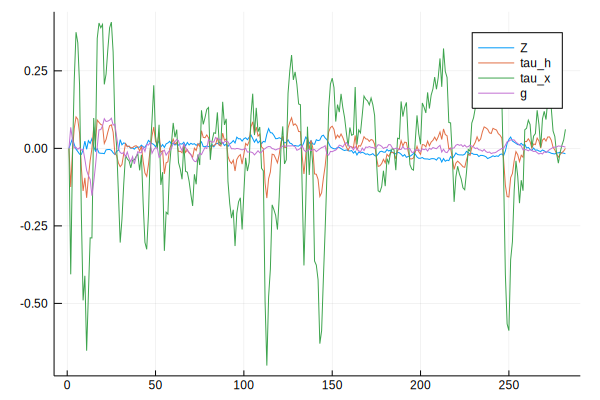

In [53]:
using LaTeXStrings
params_calibrated = [δ,θ,β,σ,ψ,γn,γz]
steadystates = [gss,τxss,τhss,zss]
A,B,C = State_Space(params_calibrated,steadystates, P,Q)
X, a, Ω = KalmanFilter(Y,A,B,C)
plot([X[2,:],X[1,:],X[4,:],X[5,:]],labels = ["Z","tau_h","tau_x","g"])

## Question 5